In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, cauchy
import math

In [2]:
# Note: "Random Variable" is abbreviated by "RV"

## Problem 1: Simulating 100 normal RVs X, given X~N(μ=1.5, σ=2).

In [3]:
mean = 1.5
standard_deviation = 2
total_samples = 100

# The function normal(x, y, z) takes in the parameters for a normal distribution 
# and returns a specified amount of samples.
samples = np.random.normal(mean, standard_deviation, total_samples)

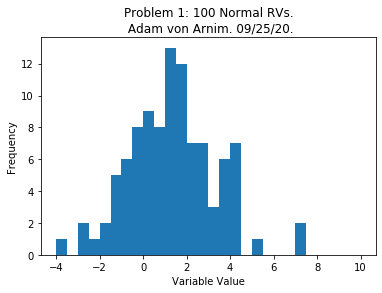

In [4]:
plt.title("Problem 1: 100 Normal RVs.\n Adam von Arnim. 09/25/20.")
plt.xlabel("Variable Value")
plt.ylabel("Frequency")
count, bins, ignored = plt.hist(samples, 28, (-4, 10))

## Problem 2: Estimating P(X > 0), given 100 samples of X, where X ~ N(μ=1.5, σ=2).

In [5]:
# An estimate for P(X > 0) can be found by finding how many of the 100 samples
# from Problem 1 had a value above 0.
samplesAboveZero = 0
for sample in samples:
    if sample > 0:
        samplesAboveZero += 1
print("Number of samples above 0: " + str(samplesAboveZero))

simulated_probability = samplesAboveZero/total_samples
simulated_probability = str(simulated_probability)
print("Proportion & estimate of samples above 0: " + str(simulated_probability))

Number of samples above 0: 75
Proportion & estimate of samples above 0: 0.75


In [6]:
# To get a theoretical value for this probability, use the normal distribution's cdf
# to find the area to the right of 0 for X ~ N(1.5, 2).
# The function cdf(x, y, z) gives the area to the left of x, so 1 - cdf(x,y,z) is 
# done to find the area to the right.
actual_probability = 1 - norm.cdf(0, 1.5, 2)
actual_probability = actual_probability.astype(str)
actual_probability = actual_probability[:5]
print("Theoretical probability: " + str(actual_probability))

Theoretical probability: 0.773


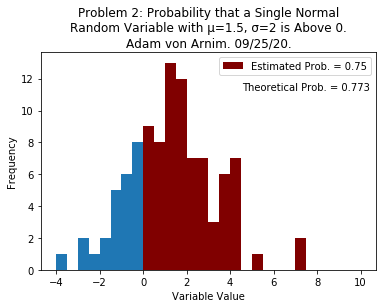

In [7]:
plt.title("Problem 2: Probability that a Single Normal\nRandom Variable with μ=1.5, σ=2 "
          + "is Above 0.\nAdam von Arnim. 09/25/20.")
count, bins, ignored = plt.hist(samples, 28, (-4, 10))
count, bins, ignored = plt.hist(samples, 20, (0, 10), color="maroon", 
                                label="Estimated Prob. = "+simulated_probability)
plt.figtext(.59, .75, "Theoretical Prob. = "+actual_probability)
plt.xlabel("Variable Value")
plt.ylabel("Frequency")
plt.legend(loc="upper right")
plt.show()

## Problem 3: Simulating 100 sample means of 20 normal RVs X, where X ~ N(μ=1.5, σ=2).

In [8]:
mean = 1.5
standard_deviation = 2
samples_per_mean = 20
total_means = 100
sample_means = []
# Collecting 100 groups of 20 samples
for i in range(0,100):
    samples = np.random.normal(mean, standard_deviation, samples_per_mean)
    sample_sum = 0
    # Finding the sample mean: the average of the 20 samples
    for sample in samples:
        sample_sum += sample
    sample_means.append(sample_sum / samples.size)

In [9]:
samplesAboveZero = 0
for sample in sample_means:
    if sample > 0:
        samplesAboveZero += 1
print("Number of sample means greater than 0: " + str(samplesAboveZero))

simulated_probability = samplesAboveZero/total_means
simulated_probability = str(simulated_probability)
print("Estimate of sample means greater than 0: " + str(simulated_probability))

Number of sample means greater than 0: 100
Estimate of sample means greater than 0: 1.0


Note that the sample mean of a normal distribution has expected value μ and variance (σ^2)/n.
Proof:
### E(X̄) = (1/n)ΣE(Xi) = (1/n)(nμ) = μ
### var(X̄) = (1/n^2)Σvar(Xi) = (1/n^2)(nσ^2) = σ^2/n

In [10]:
# Using the same principal as in Problem 2, substituting the enw variance to get 
# the theoretical value for this probability.
standard_deviation = math.sqrt(standard_deviation*standard_deviation / samples_per_mean)
actual_probability = 1 - norm.cdf(0, mean, standard_deviation)
actual_probability = actual_probability.astype(str)
actual_probability = actual_probability[:5]
actual_probability

'0.999'

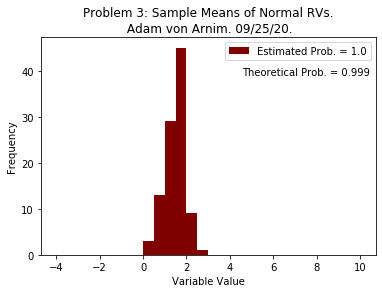

In [11]:
plt.title("Problem 3: Sample Means of Normal RVs.\n Adam von Arnim. 09/25/20.")
count, bins, ignored = plt.hist(sample_means, 28, (-4, 10))
count, bins, ignored = plt.hist(sample_means, 20, (0, 10), color="maroon", 
                                label="Estimated Prob. = "+simulated_probability)
plt.figtext(.59, .75, "Theoretical Prob. = "+actual_probability)
plt.xlabel("Variable Value")
plt.ylabel("Frequency")
plt.legend(loc="upper right")
plt.show()

## Problem 4: Comparing the estimates and histograms.

### The histogram for the 100 normal random variables has a wider distribution than the histogram for the 100 sample means. This is a result of the sample mean distribution's smaller standard deviation.
### Since the mean is above 0 and the sample means have a tighter distribution, the experimental probability of a sample mean being greater than 0 is higher than the experimental probability of a single normal random variable being greater than 0.

## Problem 5: Simulating the Cauchy Distribution.

### Part 1: Generating 100 RVs of the form 1.5+2(X/Y), where X and Y ~ N(0, 1).

In [12]:
# Generating 100 values for both X and Y
mean = 0
standard_deviation = 1
total_samples = 100

Xsamples = np.random.normal(mean, standard_deviation, total_samples)
Ysamples = np.random.normal(mean, standard_deviation, total_samples)

In [13]:
# Creating variables of the form 1.5+2(X/Y)
# These variables have the Cauchy distribution with loc=1.5, scale=2.
location = 1.5
scale = 2
variables = []
for idx in range(total_samples):
    variables.append(location+Xsamples[idx]*scale/Ysamples[idx])

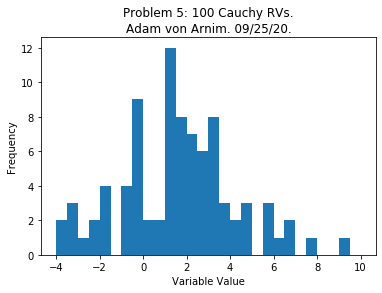

In [14]:
plt.title("Problem 5: 100 Cauchy RVs.\nAdam von Arnim. 09/25/20.")
plt.xlabel("Variable Value")
plt.ylabel("Frequency")
count, bins, ignored = plt.hist(variables, 28, (-4, 10))

### Part 2: Estimating P(C > 0), given 100 samples of C, where C = 1.5+2(X/Y)

In [15]:
# Counting the number of results above 0
samplesAboveZero = 0
for var in variables:
    if var > 0:
        samplesAboveZero += 1
print("Number of samples above 0: " + str(samplesAboveZero))
simulated_probability = samplesAboveZero/total_samples
simulated_probability = str(simulated_probability)
print("Proportion & estimate of samples above 0: " + str(simulated_probability))

Number of samples above 0: 67
Proportion & estimate of samples above 0: 0.67


In [16]:
# Since the generated variable has Cauchy distribution with known location and 
# scale parameters, the theoretical probability of a sample being less than 0 is
# given by cdf(0, location, scale) To find the probability of it being larger, 
# subtract it from 1
actual_probability = 1 - cauchy.cdf(0, location, scale)
actual_probability = actual_probability.astype(str)
actual_probability = actual_probability[:5]
print("Theoretical probability: " + str(actual_probability))

Theoretical probability: 0.704


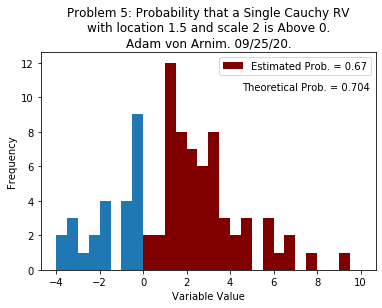

In [17]:
count, bins, ignored = plt.hist(variables, 28, (-4, 10))
count, bins, ignored = plt.hist(variables, 20, (0, 10), color="maroon", 
                                label="Estimated Prob. = "+simulated_probability)
plt.figtext(.59, .75, "Theoretical Prob. = "+actual_probability)
plt.title("Problem 5: Probability that a Single Cauchy RV\nwith location 1.5 and scale "
          + "2 is Above 0.\nAdam von Arnim. 09/25/20.")
plt.xlabel("Variable Value")
plt.ylabel("Frequency")
plt.legend(loc="upper right")
plt.show()

### Part 3: Simulating 100 Sample Means of 20 Cauchy RVs with loc=1.5, scale=2.

In [18]:
location = 1.5
scale = 2
mean = 0
standard_deviation = 1
samples_per_mean = 20
total_means = 100
sample_means = []

# Generating 100 groups of 20 samples
for i in range(total_means):
    Xsamples = np.random.normal(mean, standard_deviation, samples_per_mean)
    Ysamples = np.random.normal(mean, standard_deviation, samples_per_mean)
    sample_sum = 0
    # Finding sample mean of a group
    for idx in range(samples_per_mean):
        sample_sum += location+Xsamples[idx]*scale/Ysamples[idx]
    sample_means.append(sample_sum / samples_per_mean)


In [19]:
# Counting number of sample means above 0
samplesAboveZero = 0
for sample in sample_means:
    if sample > 0:
        samplesAboveZero += 1
print("Number of sample means above zero " + str(samplesAboveZero))

simulated_probability = samplesAboveZero/total_means
simulated_probability = str(simulated_probability)
print("Proportion & estimate of sample means above zero: " + str(simulated_probability))

Number of sample means above zero 74
Proportion & estimate of sample means above zero: 0.74


define X = mu + sigma*z
    location parameter = mu
    scale parameter = sigma
pdf of X, f(x) = (1/sigma)*f((x-mu)/sigma)
    characteristic function of X, phi(t) = Ee^(itmu)*phi(sigma*t)
    
U & V are independent RVs --> characteristic function of U+V aka phi(u+v)= phiu * phiv
    e^(it(U+V)) = e^(itu)*e^(itv)
    
given X1, ..., Xn iid as RV X
characteristic function of sample mean = (1/n)*Sum(Xk)
    phi(sample mean)(t) [by iid] = (phi(x)(t/n))^n

2) given std cauchy distribution, pdf = 1/(pi(1+x^2))
    phi(t) = e^(-|t|)
4) given Z ~ Cauchy, EZ is not defined, variance is infinity
    BUT by characteristic function, X-barn is equal in distribution to X (SHOW THIS)
    phi(x)(t) = e^(i*mu*t)e^(-|t|sigma)
    phi(x-barn)(t) = (e^(i*mu*t/n)e^(-|t/n|sigma)^n = phi(x)(t)
    
    

Note that the Cauchy distribution is a stable distribution, meaning the distribution of its sample mean is the 
same Cauchy distribution. Proof:
    
The characteristic function of X is φ(t) = Ee^(itμ)*φ(σ*t).
    Note: the characteristic function of X is the Fourier transform of the pdf.
    The Cauchy distribution pdf is 1/(pi(1+x^2)), so φx(t)=e^(i*mu*t)e^(-|t|sigma)
If U & V are independent random variables, the characteristic function of U+V, e^(it(U+V)), is e^(itu)*e^(itv).
    Given X1, ..., Xn iid, phi(x-barn)(t) = (e^(i*mu*t/n)e^(-|t/n|sigma)^n = phi(x)(t)
    

In [20]:
actual_probability = 1 - cauchy.cdf(0, location, scale)
actual_probability = actual_probability.astype(str)
actual_probability = actual_probability[:5]
print("Theoretical probability: " + str(actual_probability))

Theoretical probability: 0.704


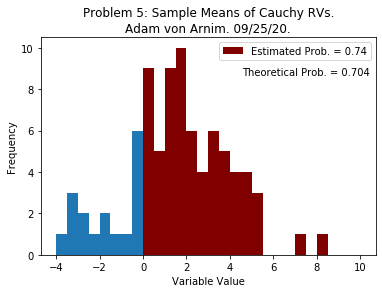

In [21]:
plt.title("Problem 5: Sample Means of Cauchy RVs.\nAdam von Arnim. 09/25/20.")
count, bins, ignored = plt.hist(sample_means, 28, (-4, 10))
count, bins, ignored = plt.hist(sample_means, 20, (0, 10), color="maroon", 
                                label="Estimated Prob. = "+simulated_probability)
plt.figtext(.59, .75, "Theoretical Prob. = "+actual_probability)
plt.xlabel("Variable Value")
plt.ylabel("Frequency")
plt.legend(loc="upper right")
plt.show()

### Part 4: Comparing the historgrams

Since the sample mean has the same distribution as the sample, the distribution is no more or less tight, and the estimated probability of getting a value above 0 is roughly the same.

### Part 5: Comparing the normal and Cauchy distributions

The Cauchy distribution is constructed by dividing normal random variables, and this results in instances where the denominator is smaller than the numerator, making the quotient large. This widens the spread of the distribution compared to the spread of a normal random variable.

In the normal sampling, P( sample mean > 0 ) becomes higher for the sample mean. This is justified by the Central Limit Theorem, which states that the variance of the sample mean is equal to the variance divided by the sample size. Considering that the Cauchy distribution is stable and does not obey the Central Limit Theorem, it makes sense that the theoretical P( sample mean > 0) remains the same.